# Validation dataset for the Dittus-Boelter correlation
Function: $\mathrm{Nu}(u,d,\nu,\kappa) = 0.023\frac{u^{0.8}d^{0.8}}{\nu^{0.4}\kappa^{0.4}}$

In [ ]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from Regression.dataset import InvarianceDataset
from Regression.model import InvarianceModel
from Regression.detector import InvarianceDetector

warnings.filterwarnings("ignore", category=DeprecationWarning)

## Reads the noisy dataset

In [ ]:
xlsx_path = "../../Data/Dittus Noise.xlsx"
df = pd.read_excel(xlsx_path)

In [3]:
dataset = InvarianceDataset(df, "Nu")

In [5]:
# show a quick summary and the head of the dataframe
print("\nDataFrame summary (first 5 rows):\n")
print(dataset.head())

# show descriptive statistics
print("\nDescriptive statistics:\n")
print(dataset.summary())


DataFrame summary (first 5 rows):

          u         d             ν             κ          Nu
1  0.801540  0.012233  8.947896e-07  1.454717e-07   93.513278
1  0.259575  0.078404  8.947896e-07  1.454717e-07  134.662790
1  0.475659  0.042545  8.947896e-07  1.454717e-07  136.727585
1  0.774637  0.063439  8.947896e-07  1.454717e-07  282.544769
1  0.993837  0.043410  8.947896e-07  1.454717e-07  252.712220

Descriptive statistics:

                 u            d             ν             κ           Nu
count  8000.000000  8000.000000  8.000000e+03  8.000000e+03  8000.000000
mean      0.552120     0.054439  6.108286e-07  9.066672e-08   288.848517
std       0.258749     0.026048  2.931597e-07  1.911857e-08   181.222041
min       0.100287     0.010000  2.803664e-07  7.220751e-08    15.141626
25%       0.331023     0.031602  3.917395e-07  7.708602e-08   145.360942
50%       0.548265     0.054159  5.366270e-07  8.458695e-08   249.470304
75%       0.776850     0.076762  7.471262e-07  9.606368

## DNN model

In [6]:
X_train, X_test, y_train, y_test = dataset.train_test_split()

In [7]:
# Initialize the DNN model
model = InvarianceModel(input_dim=4)

In [8]:
# Build and compile the DNN model
model.build_and_compile(X_train)

### Train the model if not saved already

In [10]:
# Train the model
checkpoint_filepath = './tmp/checkpoint_dittus.weights.h5'
model_filepath = './tmp/checkpoint_dittus.keras'
model.train(X_train, y_train, checkpoint_path=checkpoint_filepath, model_path=model_filepath)

Epoch 1/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 242.5475 - val_loss: 120.3134
Epoch 2/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 59.5046 - val_loss: 45.4189
Epoch 3/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 42.4700 - val_loss: 39.3437
Epoch 4/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 37.5078 - val_loss: 35.3525
Epoch 5/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 33.3845 - val_loss: 31.0309
Epoch 6/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 30.1100 - val_loss: 28.3007
Epoch 7/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 28.1355 - val_loss: 27.0540
Epoch 8/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 27.0213 - val_loss: 26.1862
Epoch 9/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 26.3361 - val_loss: 25.4513
Epoch 10/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 25.8461 - val_loss: 25.0996
Epoch 11/200
181/181 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 25.5974 - val_loss: 25.0326
Epoch 12/200
181/

In [11]:
# Save training history
history_filepath = './tmp/checkpoint_dittus.pkl'
model.save_history(history_filepath)

### Otherwise, load trained model

In [12]:
# Reload model and history
history_filepath = './tmp/checkpoint_dittus.pkl'
history = model.load_history(history_filepath)

model_filepath = './tmp/checkpoint_dittus.keras'
model.load_model(model_filepath)

### Model metrics

In [13]:
# Evaluate on test set
r2, mae, rmse = model.evaluate(X_test, y_test)

print(f"R² = {r2:.3f}")
print(f"MAE = {mae:.3f}")
print(f"RMSE = {rmse:.3f}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
R² = 0.964
MAE = 23.868
RMSE = 35.200


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


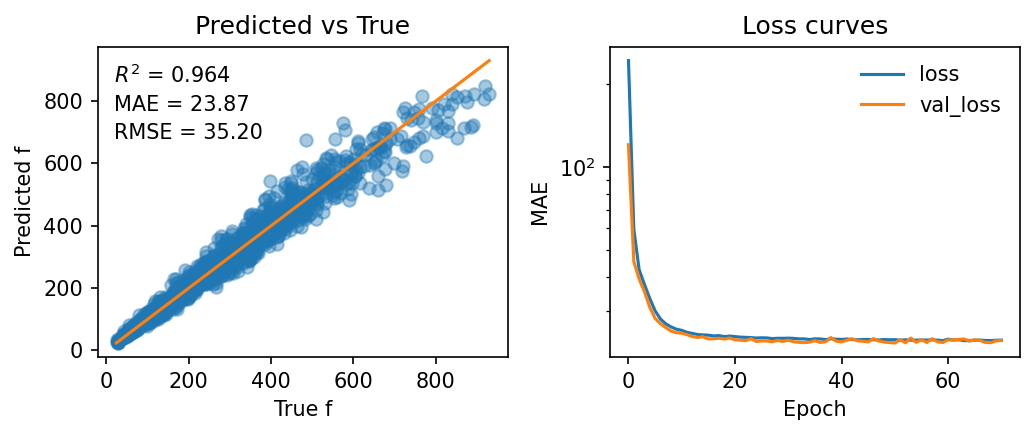

In [14]:
delta = max(y_test) - min(y_test)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), dpi=150)
test_predictions = model.predict(X_test)

# Scatter predicted vs true
ax1.scatter(y_test, test_predictions, alpha=0.4)
p1 = max(max(test_predictions), max(y_test))
p2 = min(min(test_predictions), min(y_test))
ax1.plot([p1, p2], [p1, p2], "C1")
ax1.annotate(f"$R^2$ = {r2:.3f}", xy=(0.02 * delta, 0.95 * delta))
ax1.annotate(f"MAE = {mae:.2f}", xy=(0.02 * delta, 0.85 * delta))
ax1.annotate(f"RMSE = {rmse:.2f}", xy=(0.02 * delta, 0.75 * delta))
ax1.set_xlabel("True f")
ax1.set_ylabel("Predicted f")
ax1.set_title("Predicted vs True")

# Loss curves
ax2.plot(history['loss'], label='loss')
ax2.plot(history['val_loss'], label='val_loss')
ax2.set_yscale('log')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('MAE')
ax2.legend(frameon=False)
ax2.set_title("Loss curves")

plt.tight_layout()
plt.show()

## Invariance detection
This section performs feature grouping analysis using combinations of two and three features.

The analysis aims to detect invariant groups of features in the form 
- $x_i^{\alpha_1} x_j^{\alpha_2}$ for pairs,
- $x_i^{\alpha_1} x_j^{\alpha_2} x_k^{\alpha_3}$ for triplets.

In [15]:
# Load the pre-trained model
model = InvarianceModel(input_dim=4)
model_filepath = './tmp/checkpoint_dittus.keras'
model.load_model(model_filepath)

In [16]:
# List of features
feature_names = dataset.feature_names
feature_names

['u', 'd', 'ν', 'κ']

### Initialize the Detector

In [17]:
detector = InvarianceDetector()

### Look for pairs

In [ ]:
pairs = detector.find_invariant_pairs(dataset, model, [0.5, -0.5])

100%|██████████| 6/6 [00:24<00:00,  4.03s/it]


In [ ]:
print(pairs)

  feature_pair    mean_a     std_a    mean_b     std_b
0       (u, d) -0.652327  0.083506 -0.750044  0.070220
1       (u, ν)  0.893361  0.027758 -0.444835  0.057064
2       (u, κ)  0.891827  0.014382 -0.451263  0.028266
3       (d, ν)  0.881051  0.021266 -0.470829  0.040219
4       (d, κ)  0.884468  0.018121 -0.464961  0.034637
5       (ν, κ) -0.670900  0.073268 -0.734717  0.068673


In [ ]:
detector.plot_results("pair", figsize=(6,3), dpi=300)

### Look for triplets

In [ ]:
triplets = detector.find_invariant_triplets(dataset, model, [0.5, 0.5, -0.5])

100%|██████████| 4/4 [00:37<00:00,  9.42s/it]


In [26]:
print(triplets)

  feature_triplet    mean_a     std_a    mean_b     std_b    mean_c     std_c
0       (u, d, ν)  0.650352  0.028832  0.666666  0.041324 -0.356723  0.052995
1       (u, d, κ)  0.651864  0.036299  0.677805  0.036181 -0.334409  0.034605
2       (u, ν, κ)  0.872927  0.033363 -0.315324  0.075115 -0.357140  0.065315
3       (d, ν, κ)  0.826470  0.034859 -0.404899  0.061620 -0.382483  0.041216
